In [0]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split


import pickle
import unicodedata
import re
import numpy as np
import os
import io
import time

In [2]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

plt.rcParams['font.family']='TH Sarabun New'  
%matplotlib inline

--2020-05-21 13:06:59--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2020-05-21 13:07:00--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.1’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.03s   

2020-05-21 13:07:00 (2.84 MB/s) - ‘thsa

# My own data preparation

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#with open('/content/drive/Shared drives/NeuroSummary/data/b_data_playground/thai_gov_split/train_v2.pkl', 'rb') as f:
with open('/content/drive/Shared drives/NeuroSummary/data/b_data_playground/thai_gov_split/train_stop_v2.pkl', 'rb') as f:
  train_set = pickle.load(f)

#with open('/content/drive/Shared drives/NeuroSummary/data/b_data_playground/thai_gov_split/val_v2.pkl', 'rb') as f:
with open('/content/drive/Shared drives/NeuroSummary/data/b_data_playground/thai_gov_split/val_stop_v2.pkl', 'rb') as f:
  val_set = pickle.load(f)

#with open('/content/drive/Shared drives/NeuroSummary/data/b_data_playground/thai_gov_split/test_v2.pkl', 'rb') as f:
with open('/content/drive/Shared drives/NeuroSummary/data/b_data_playground/thai_gov_split/test_stop_v2.pkl', 'rb') as f:
  test_set = pickle.load(f)

In [4]:
train_set.head()

,content,headline,class
11629,"[กระทรวงทรัพยากรธรรมชาติ, และสิ่ง, แวดล้อม, กร...","[ทส., ประชุม, ลด, ปริมาณ, ขยะ, ทะเล, ประเทศอาเ...",ด้านความมั่นคง
8470,"[28, มิถุนายน, 2560, เวลา, 11, ., 30, น., บริเ...","[นายก, รัฐมนตรี, เผย, ต้องการ, ปกครอง, ประเทศไ...",ข่าวทำเนียบรัฐบาล
6389,"[จันทร์, 9, กรกฎาคม, 2561, เวลา, 09, ., 00, น....","[ม.ล.ปนัดดาฯ, สุนทรพจน์, พิธี, ประชุม, Invitat...",ด้านกฎหมายฯ
1058,"[รอง, ปลัด, กระทรวงดิจิทัลฯ, นางวรรณพร เทพหัสด...","[รอง, ปลัด, กระทรวงดิจิทัลฯ, งาน, พัฒนา, เครือ...",ด้านสังคม
6155,"[รัฐบาล, เร่งรัด, ขับ, เคลื่อน, งาน, ประชาชน, ...","[เร่ง, เดินหน้า, 5, โครงการ, ลด, เหลื่อมล้ำ]",รายการวิทยุไทยคู่ฟ้า


In [0]:
## ! use only n first words for headline generation
def use_first_n_words(df_content, n, start_stop):
  new_ls = []
  for content in df_content:
    if start_stop:
      tmp = content[:n-2]
      tmp.insert(0, '<s>')
      tmp.append('</s>')
    else:
      tmp = content[:n]
    new_ls.append(tmp)
  return new_ls

# def use_first_n_words(df_content, n, start_stop=False):
#   new_ls = []
#   for content in df_content:
#     tmp = content[:n]
#     new_ls.append(tmp)
#   return new_ls

#define_n_first_words
n_first_content = 50
n_first_headline = 22

#trim sentence
words_train_contents = use_first_n_words(train_set['content'], n=n_first_content,start_stop=False)
words_train_headlines = use_first_n_words(train_set['headline'], n=n_first_headline,start_stop=True)
words_val_contents = use_first_n_words(val_set['content'], n=n_first_content, start_stop=False)
words_val_headlines = use_first_n_words(val_set['headline'], n=n_first_headline,start_stop=True)
words_test_contents = use_first_n_words(test_set['content'], n=n_first_content, start_stop=False)
words_test_headlines = use_first_n_words(test_set['headline'], n=n_first_headline, start_stop=True)
# words_val_headlines = use_first_n_words(val_set['headline'], n=n_first_headline,start_stop=False)
# words_test_contents = use_first_n_words(test_set['content'], n=n_first_content, start_stop=False)
# words_test_headlines = use_first_n_words(test_set['headline'], n=n_first_headline, start_stop=False)


# generate gold_sum
gold_sum_train = list(map(lambda x: " ".join(x),words_train_headlines))
gold_sum_val = list(map(lambda x: " ".join(x),words_val_headlines))
gold_sum_test = list(map(lambda x: " ".join(x),words_test_headlines))

In [6]:
import collections
def create_index(input_data,threshold):
    input_text = [data for data in input_data]
    # counts of word type has to be above or equal threshold
    words = [word for sublist in input_text for word in sublist]
    print("words :",words)
    word_count_all = list()
    word_count = list()
    #use set and len to get the number of unique words
    word_count_all.extend(collections.Counter(words).most_common(len(set(words))))
    unkcnt = 0
    for (word,cnt) in word_count_all:
      if cnt >= threshold:
        word_count.append((word,cnt))
      else:
        unkcnt+=cnt
    #include a token for unknown word
    word_count.append(("UNK",unkcnt))
    #print out 10 most frequent words
    # print("top 10: ",word_count[:10])
    # print("bottom 10: ",word_count[-10:])
    dictionary = dict()
    dictionary["for_keras_zero_padding"] = 0
    for word in word_count:
      dictionary[word[0]] = len(dictionary)
    # dictionary['<s>'] = len(dictionary) 
    # dictionary['</s>'] = len(dictionary)
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    
    return dictionary, reverse_dictionary
dict_t, rev_dict_t = create_index(input_data=words_train_contents+words_train_headlines,threshold=0)
# dict_t, rev_dict_t = create_index(input_data=words_train_contents,threshold=0)

# dict_stop_t, rev_dict_stop_t = create_index(input_data=words_70_train_stop_contents+words_20_train_stop_headlines,threshold=0)
print('Vocab size (Content): ',len(dict_t))
# print('Vocab stop ?size (Content): ',len(dict_stop_t))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
def convert(input_data,dictionary) :
  X = list()
  for data in input_data:
    sub_data = []
    for word in data:
      if word in dictionary:
        sub_data.append(dictionary[word])
      else:
        sub_data.append(dictionary["UNK"])
    X.append(sub_data)
  return np.array(X)

In [0]:
X_train = convert(words_train_contents,dict_t)
y_train = convert(words_train_headlines,dict_t)
X_val = convert(words_val_contents,dict_t)
y_val = convert(words_val_headlines,dict_t)
X_test = convert(words_test_contents,dict_t)
y_test = convert(words_test_headlines,dict_t)

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen_input = 50
maxlen_output = 22

X_train = pad_sequences(X_train, maxlen=maxlen_input, padding='post')
y_train = pad_sequences(y_train, maxlen=maxlen_output, padding='post')
X_val = pad_sequences(X_val, maxlen=maxlen_input, padding='post')
y_val = pad_sequences(y_val, maxlen=maxlen_output, padding='post')
X_test = pad_sequences(X_test, maxlen=maxlen_input, padding='post')
y_test = pad_sequences(y_test, maxlen=maxlen_output, padding='post')

# TF 2.0 data preparation

In [0]:
BUFFER_SIZE = len(X_train)
BATCH_SIZE = 64
VAL_BATCH_SIZE = 64
VAL_BUFFER_SIZE = len(X_val)
steps_per_epoch = len(X_train)//BATCH_SIZE
val_steps_per_epoch = len(X_val)//VAL_BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(dict_t)
vocab_tar_size = len(dict_t)

dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [0]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).shuffle(VAL_BUFFER_SIZE)
val_dataset = val_dataset.batch(VAL_BATCH_SIZE, drop_remainder=True)

In [12]:
val_example_input_batch, val_example_target_batch = next(iter(val_dataset))
val_example_input_batch.shape, val_example_target_batch.shape

(TensorShape([64, 50]), TensorShape([64, 22]))

In [13]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 50]), TensorShape([64, 22]))

In [0]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [15]:
print(vocab_inp_size)
print(embedding_dim)
print(units)
print(BATCH_SIZE)

31180
256
1024
64


In [16]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 50, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


In [17]:
# sample input
sample_hidden = encoder.initialize_hidden_state()
print(sample_hidden.shape)
print(example_input_batch.shape)

(64, 1024)
(64, 50)


# Additive attention

In [0]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)
    print(query_with_time_axis.shape)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))
    print(score.shape)

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [0]:
# class BahdanauAttention(tf.keras.layers.Layer):
#     def __init__(self, num_units):
#         super(BahdanauAttention, self).__init__()
#         self.W1 = tf.keras.layers.Dense(num_units)
#         self.W2 = tf.keras.layers.Dense(num_units)
#         self.V = tf.keras.layers.Dense(1)

#     def call(self, query, values):
#         # query is the decoder state at time step j
#         # query.shape: (batch_size, num_units)
#         # values are encoder states at every timestep i
#         # values.shape: (batch_size, num_timesteps, num_units)

#         # add time axis to query: (batch_size, 1, num_units)
#         query_with_time_axis = tf.expand_dims(query, axis=1)
#         # compute score:
#         score = self.V(tf.keras.activations.tanh(
#             self.W1(values) + self.W2(query_with_time_axis)))
#         # compute softmax
#         alignment = tf.nn.softmax(score, axis=1)
#         # compute attended output
#         context = tf.reduce_sum(
#             tf.linalg.matmul(
#                 tf.linalg.matrix_transpose(alignment),
#                 values
#             ), axis=1
#         )
#         context = tf.expand_dims(context, axis=1)
#         return context, alignment


In [19]:
attention_layer = BahdanauAttention(21)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

(64, 1, 1024)
(64, 50, 1)
Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 50, 1)


# Multiplicative attention

In [20]:
!pip install tensorflow-addons

In [0]:
# class LuongAttention(tf.keras.layers.Layer):
#     def __init__(self, num_units):
#         super(LuongAttention, self).__init__()
#         self.W = tf.keras.layers.Dense(num_units)

#     def call(self, query, values):
#         # add time axis to query
#         query_with_time_axis = tf.expand_dims(query, axis=1)
#         # compute score
#         score = tf.linalg.matmul(
#             query_with_time_axis, self.W(values), transpose_a=True)
#         # compute softmax
#         attention_weights = tf.nn.softmax(score, axis=1)
#         # compute attended output
#         context_vector = attention_weights * values
#         context_vector = tf.reduce_sum(context_vector, axis=1)
#         return context_vector, attention_weights
class LuongAttention(tf.keras.layers.Layer):
    def __init__(self, num_units):
        super(LuongAttention, self).__init__()
        self.W = tf.keras.layers.Dense(num_units)

    def call(self, query, values):
        # query hidden state shape == (batch_size, hidden size)
        # query_with_time_axis shape == (batch_size, 1, hidden size)
        # values shape == (batch_size, max_len, hidden size)
        # add time axis to query

        query_with_time_axis = tf.expand_dims(query, axis=1)
        # compute score
        score = tf.matmul(
            query_with_time_axis,
            self.W(values),
            transpose_b=True
            )
        '''query_with_time_axis = tf.expand_dims(query, axis=1)
        # compute score
        score = tf.matmul(
            tf.transpose(query_with_time_axis), self.W(values)
        )
        )'''
        # compute softmax
        alignment = tf.nn.softmax(score, axis=2)
        # compute attended output
        context = tf.squeeze(tf.transpose(tf.matmul(alignment, values),[0,2,1]),[2])
        alignment = tf.transpose(alignment,[0,2,1])
        return context, alignment

In [0]:
# a = tf.constant(np.arange(64*1024), shape=(64,1,1024))
# transposed_a = tf.transpose(a)
# b = tf.constant(np.arange(64*50*20), shape=(64, 50, 20))
# tf.matmul(transposed_a, b)

In [23]:
attention_layer = LuongAttention(1024)
# attention_result, attention_weights = tfa.seq2seq.LuongAttention(1, sample_hidden, sample_output)
# attention_result, attention_weights = tfa.seq2seq.BahdanauAttention(1, sample_hidden, sample_output)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 50, 1)


# Decoding

In [0]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for additive attention
    #self.attention = BahdanauAttention(self.dec_units)
    
    # used for multiplicative attention
    self.attention = LuongAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [25]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 31180)


In [0]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [0]:
checkpoint_dir = '/content/drive/My Drive/Colab Notebooks/nlp_project_files/without_stop'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

# Teacher forcing

In [0]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([dict_t['<s>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):

      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

@tf.function
def val_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([dict_t['<s>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):

      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  return batch_loss


In [29]:
from tqdm import tqdm_notebook
EPOCHS = 30

for epoch in range(EPOCHS):
  start = time.time()


  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0
  val_total_loss = 0


  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):

    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 50 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  for (batch, (val_inp, val_targ)) in enumerate(val_dataset.take(val_steps_per_epoch)):
    val_batch_loss = val_step(val_inp, val_targ, enc_hidden)
    val_total_loss += val_batch_loss
  
  # saving (checkpoint) the model every 10 epochs
  if (epoch + 1) % 1 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch), end=', ')
  print('Val loss {:.4f}'.format(val_total_loss / val_steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 6.5113
Epoch 1 Batch 50 Loss 4.6616
Epoch 1 Batch 100 Loss 3.7478
Epoch 1 Batch 150 Loss 4.4191
Epoch 1 Loss 4.4133, Val loss 4.1912
Time taken for 1 epoch 77.09091401100159 sec

Epoch 2 Batch 0 Loss 3.8687
Epoch 2 Batch 50 Loss 3.9723
Epoch 2 Batch 100 Loss 3.8394
Epoch 2 Batch 150 Loss 4.2381
Epoch 2 Loss 4.0167, Val loss 3.9821
Time taken for 1 epoch 48.88795781135559 sec

Epoch 3 Batch 0 Loss 3.7808
Epoch 3 Batch 50 Loss 3.8168
Epoch 3 Batch 100 Loss 3.4368
Epoch 3 Batch 150 Loss 3.3911
Epoch 3 Loss 3.7875, Val loss 3.8348
Time taken for 1 epoch 49.11192560195923 sec

Epoch 4 Batch 0 Loss 3.6309
Epoch 4 Batch 50 Loss 3.8610
Epoch 4 Batch 100 Loss 3.5379
Epoch 4 Batch 150 Loss 3.1566
Epoch 4 Loss 3.6166, Val loss 3.7221
Time taken for 1 epoch 48.717281341552734 sec

Epoch 5 Batch 0 Loss 3.2259
Epoch 5 Batch 50 Loss 3.5092
Epoch 5 Batch 100 Loss 3.4779
Epoch 5 Batch 150 Loss 2.9813
Epoch 5 Loss 3.4732, Val loss 3.6759
Time taken for 1 epoch 50.21935057640076 sec


# Scheduled sampling


In [0]:
@tf.function
def train_step(inp, targ, enc_hidden, it):
  loss = 0
  epsilon = 0.9999999
  k = 3
  c = 0.1


  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([dict_t['<s>']] * BATCH_SIZE, 1)

    eps = tf.math.maximum(epsilon, k-c*it)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):

      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      _x = tf.random.uniform(shape=[], minval=0,maxval=1)
      if _x < eps:
        # using teacher forcing
        dec_input = tf.expand_dims(targ[:, t], 1)
      else:
        # dont use teacher forcing
        # print(predictions)
        # print(tf.math.argmax(predictions, axis=1))
        dec_input = tf.cast(tf.expand_dims(tf.math.argmax(predictions, axis=1), 1), dtype=tf.int32)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

@tf.function
def val_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([dict_t['<s>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):

      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  return batch_loss


In [0]:
from tqdm import tqdm_notebook
EPOCHS = 10

for epoch in range(EPOCHS):
  start = time.time()


  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0
  val_total_loss = 0


  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):

    batch_loss = train_step(inp, targ, enc_hidden, epoch)
    total_loss += batch_loss

    if batch % 50 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  for (batch, (val_inp, val_targ)) in enumerate(val_dataset.take(val_steps_per_epoch)):
    val_batch_loss = val_step(val_inp, val_targ, enc_hidden)
    val_total_loss += val_batch_loss
    
  
  # saving (checkpoint) the model every 10 epochs
  if (epoch + 1) % 1 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch), end=', ')
  print('Val loss {:.4f}'.format(val_total_loss / val_steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 7.8780
Epoch 1 Batch 50 Loss 5.1970
Epoch 1 Batch 100 Loss 4.9083
Epoch 1 Batch 150 Loss 5.2637
Epoch 1 Loss 5.4086, Val loss 5.1159
Time taken for 1 epoch 100.53334522247314 sec

Epoch 2 Batch 0 Loss 5.0425
Epoch 2 Batch 50 Loss 5.0003
Epoch 2 Batch 100 Loss 5.0092
Epoch 2 Batch 150 Loss 4.9233
Epoch 2 Loss 4.7777, Val loss 4.5657
Time taken for 1 epoch 72.61401915550232 sec

Epoch 3 Batch 0 Loss 4.4000
Epoch 3 Batch 50 Loss 3.9984
Epoch 3 Batch 100 Loss 4.2950
Epoch 3 Batch 150 Loss 3.9079
Epoch 3 Loss 4.1861, Val loss 4.1462
Time taken for 1 epoch 72.43060111999512 sec

Epoch 4 Batch 0 Loss 3.7138
Epoch 4 Batch 50 Loss 3.5746
Epoch 4 Batch 100 Loss 3.8774
Epoch 4 Batch 150 Loss 3.7605
Epoch 4 Loss 3.7613, Val loss 3.9277
Time taken for 1 epoch 74.3675184249878 sec

Epoch 5 Batch 0 Loss 3.1640
Epoch 5 Batch 50 Loss 3.4662
Epoch 5 Batch 100 Loss 3.2167
Epoch 5 Batch 150 Loss 3.3937
Epoch 5 Loss 3.4426, Val loss 3.7726
Time taken for 1 epoch 75.61679553985596 sec



In [0]:
from tqdm import tqdm_notebook
INITIAL_EPOCH = 10
EPOCHS = 20

for epoch in range(INITIAL_EPOCH, EPOCHS):
  start = time.time()


  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0
  val_total_loss = 0


  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):

    batch_loss = train_step(inp, targ, enc_hidden, epoch)
    total_loss += batch_loss

    if batch % 50 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  for (batch, (val_inp, val_targ)) in enumerate(val_dataset.take(val_steps_per_epoch)):
    val_batch_loss = val_step(val_inp, val_targ, enc_hidden)
    val_total_loss += val_batch_loss
    
  
  # saving (checkpoint) the model every epochs
  if (epoch + 1) % 1 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch), end=', ')
  print('Val loss {:.4f}'.format(val_total_loss / val_steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 11 Batch 0 Loss 2.1112
Epoch 11 Batch 50 Loss 2.2165
Epoch 11 Batch 100 Loss 1.9869
Epoch 11 Batch 150 Loss 2.4663
Epoch 11 Loss 2.1818, Val loss 3.5631
Time taken for 1 epoch 69.56328654289246 sec

Epoch 12 Batch 0 Loss 2.0357
Epoch 12 Batch 50 Loss 2.1683
Epoch 12 Batch 100 Loss 2.0346
Epoch 12 Batch 150 Loss 2.0967
Epoch 12 Loss 2.0275, Val loss 3.5722
Time taken for 1 epoch 73.05270290374756 sec

Epoch 13 Batch 0 Loss 1.7976
Epoch 13 Batch 50 Loss 1.8571
Epoch 13 Batch 100 Loss 1.8191
Epoch 13 Batch 150 Loss 2.0240
Epoch 13 Loss 1.8785, Val loss 3.5863
Time taken for 1 epoch 72.75101017951965 sec

Epoch 14 Batch 0 Loss 1.6867
Epoch 14 Batch 50 Loss 1.7160
Epoch 14 Batch 100 Loss 1.7201
Epoch 14 Batch 150 Loss 1.7364
Epoch 14 Loss 1.7362, Val loss 3.6131
Time taken for 1 epoch 70.98681879043579 sec

Epoch 15 Batch 0 Loss 1.4626
Epoch 15 Batch 50 Loss 1.6035
Epoch 15 Batch 100 Loss 1.7036
Epoch 15 Batch 150 Loss 1.5490
Epoch 15 Loss 1.5998, Val loss 3.6551
Time taken for 1 epoc

# Generation

In [0]:
def evaluate(sentence):
  attention_plot = np.zeros((maxlen_output, maxlen_input))

  inputs = sentence.reshape(1, maxlen_input)
  # sentence = preprocess_sentence(sentence)

  # inputs = [rev_dict_t[i] for i in sentence.split(' ')]
  # inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
  #                                                        maxlen=max_length_inp,
  #                                                        padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = '<s> '

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([dict_t['<s>']], 0)
  for t in range(maxlen_output):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += rev_dict_t[predicted_id] + ' '

    if rev_dict_t[predicted_id] == '</s>':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

In [0]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
   
  plt.show()

In [0]:
import seaborn as sns
def index2sentence(indexes):
  result = ''
  for i, index in enumerate(indexes):
    result += rev_dict_t[index] + ' '

    if rev_dict_t[index] == '</s>':
      return result
    
  return result

def translate(sentence, plot=True):
  result, sentence, attention_plot = evaluate(sentence)

  if not plot:
    return result

  print('Input: %s' % (sentence))
  print('prediction : {}'.format(result))
  
  
  sentence = index2sentence(sentence)
  
  if plot:
    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    # plot_attention(attention_plot, sentence.split(' '), result.split(' '))
    plt.figure(figsize=(20,10))
    sns.heatmap(attention_plot, yticklabels = result.split(' '), xticklabels = sentence.split(' '), linewidths=0.01)
    plt.show()

In [64]:
# restoring the latest checkpoint in checkpoint_dir
# checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
checkpoint.restore(os.path.join(checkpoint_dir, 'ckpt-20'))

In [65]:
X_test[0].shape

(50,)

In [66]:
print('headline : ',index2sentence(y_test[0]))
print('content  : ',index2sentence(X_test[0]))

headline :  <s> สคบ. ชี้แจง กรณี ผลิตภัณฑ์ เสริม อาหาร น้ำ UNK </s> 
content  :  7 ก.ย. 2561 พลตำรวจตรี ประสิทธิ์ เฉลิมวุฒิศักดิ์ เลขาธิการ คณะ กรรมการคุ้มครอง บริโภค สำนักงานคณะกรรมการคุ้มครอง บริโภค ชี้แจง ประเด็น ผลิตภัณฑ์ เสริม อาหาร น้ำ UNK คาว กรณี UNK อายุ 56 ปี บ้าน UNK จ.ขอนแก่น ร้องเรียน สื่อ มวล ชน เกี่ยว ผลิตภัณฑ์ เสริม อาหาร น้ำ UNK พนักงาน ขาย เสนอ ขาย อ้าง ดื่ม รักษา อาการ ปวด ขา หยอด ตา รักษา อาการ 


Input: [  152   461    10  7637   145    12  2358   361  6051   361   124   206
   271   628   256    63 31179 30831    94 31179   467  2417     8   136
 31179  2249   798   238   418   372   189   271   628   256    63 31179
   650   341   194   341  1045   612   278  1018  3914  1717 10452  1032
   278  1018]
prediction : <s> ออมสิน ชี้แจง กรณี มิจฉาชีพ </s> 


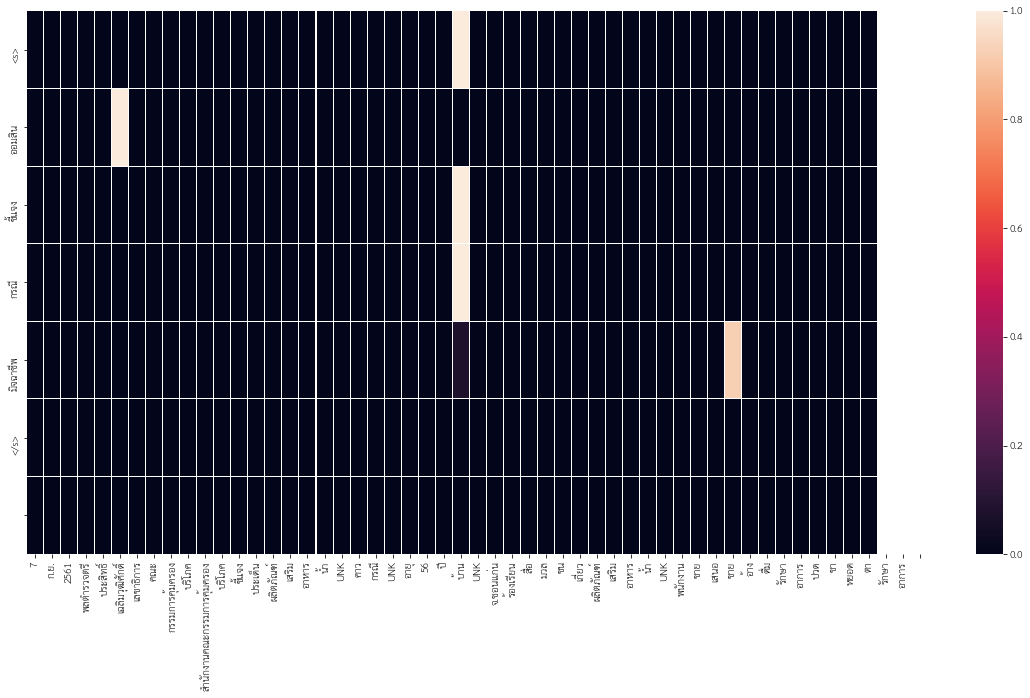

In [67]:
translate(X_test[0])

headline  :  <s> สคบ. ชี้แจง กรณี ผลิตภัณฑ์ เสริม อาหาร น้ำ UNK </s> 
content   :  7 ก.ย. 2561 พลตำรวจตรี ประสิทธิ์ เฉลิมวุฒิศักดิ์ เลขาธิการ คณะ กรรมการคุ้มครอง บริโภค สำนักงานคณะกรรมการคุ้มครอง บริโภค ชี้แจง ประเด็น ผลิตภัณฑ์ เสริม อาหาร น้ำ UNK คาว กรณี UNK อายุ 56 ปี บ้าน UNK จ.ขอนแก่น ร้องเรียน สื่อ มวล ชน เกี่ยว ผลิตภัณฑ์ เสริม อาหาร น้ำ UNK พนักงาน ขาย เสนอ ขาย อ้าง ดื่ม รักษา อาการ ปวด ขา หยอด ตา รักษา อาการ 
Input: [  152   461    10  7637   145    12  2358   361  6051   361   124   206
   271   628   256    63 31179 30831    94 31179   467  2417     8   136
 31179  2249   798   238   418   372   189   271   628   256    63 31179
   650   341   194   341  1045   612   278  1018  3914  1717 10452  1032
   278  1018]
prediction : <s> ออมสิน ชี้แจง กรณี มิจฉาชีพ </s> 


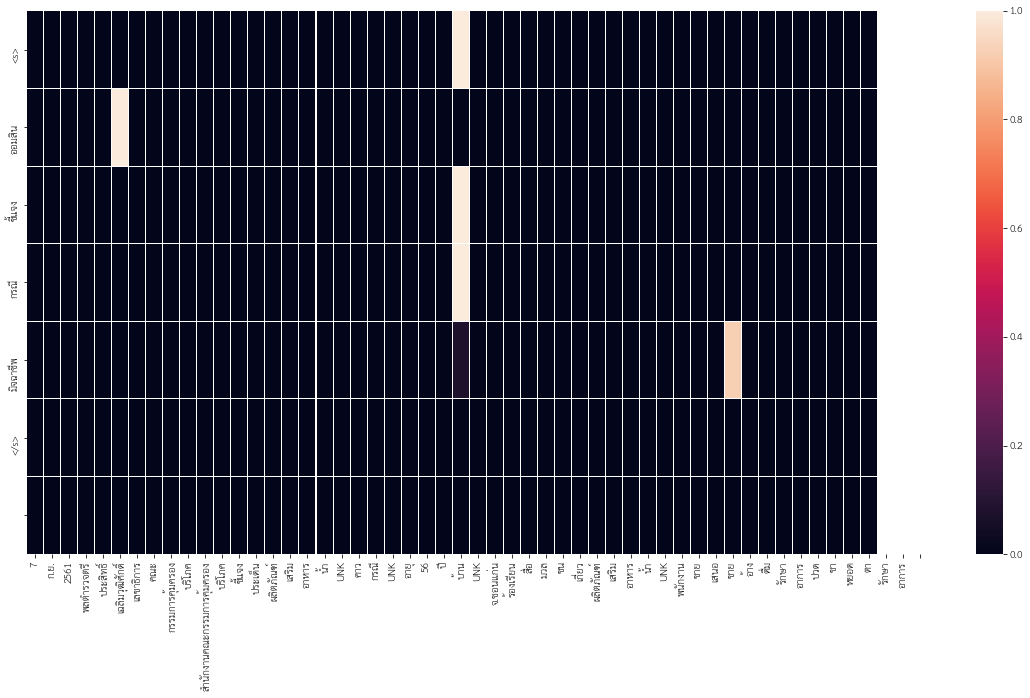

######################################################################################################################################################
headline  :  <s> ตรวจ ราชการ กระทรวงอุตสาหกรรม พื้นที่ ตรวจ ราชการ รอบ 2 ประจำ ปี งบ พ.ศ. 2561 เขต พื้นที่ รับผิดชอบ จังหวัดกำแพงเพชร </s> 
content   :  28 สิงหาคม 2561 นายจุลพงษ์ ทวีศรี UNK UNK จังหวัดกำแพงเพชร เจ้าหน้าที่ อุตสาหกรรม จังหวัดกำแพงเพชร ต้อนรับ พื้นที่ ตรวจ เยี่ยม โครงการ เสริมสร้าง เศรษฐกิจ ฐาน ชุมชน local economy หมู่ บ้าน CIV กระทง เปลือก ข้าวโพด UNK ดอก ไม้ ตก อ.โกสัมพีนคร จ.กำแพงเพชร ภูมิปัญญา ท้องถิ่น เอกลักษณ์ โดดเด่น ชุมชน ผลิต กระทง เปลือก ข้าวโพด โลก วัสดุ ผลิต เกษตร จำหน่าย ประเทศ ตอบสนอง นโยบาย 
Input: [  294   185    10  1879 31179 31179  4563   133   102  4563   161    20
    49    76    21   421    44   514   101 18212 11949   367   136  1685
  1721  1484  1289 31179   790   512   607 18217  3357  1085   438  2074
  2134   101    95  1721  1484  1289   147  1946    95    92   374    26
  1546    48]
predicti

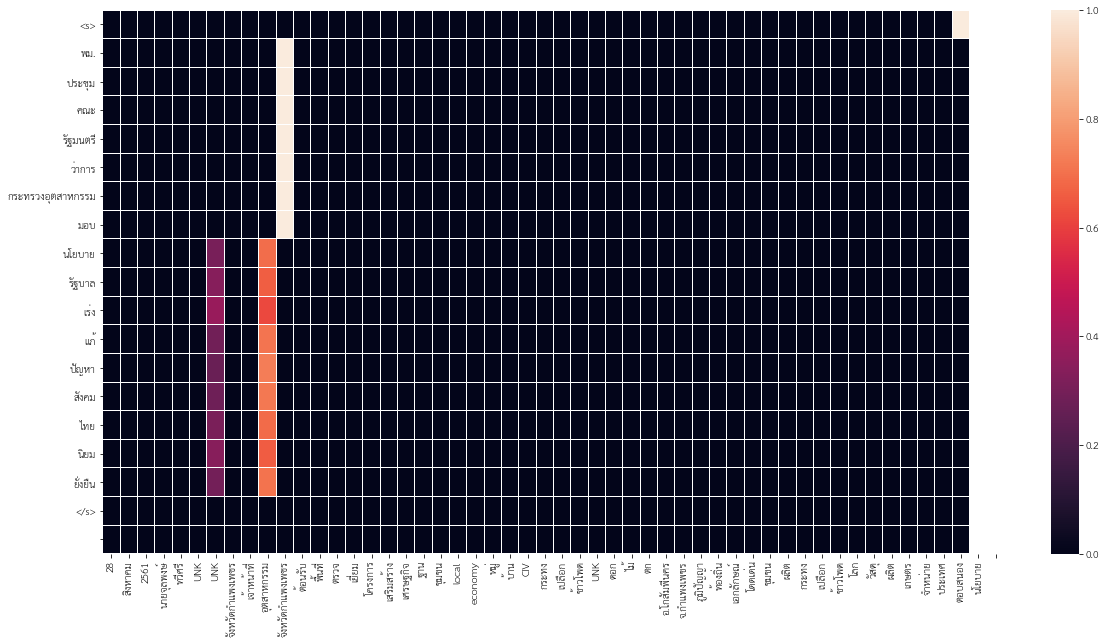

######################################################################################################################################################
headline  :  <s> รัฐบาล แนว ภาษี VAT วอน สังคม อย่า ตื่นตระหนก หลง ย้ำ นายก UNK โพล ชี้ ทำ หน้าที่ ดี ประชาชน ตัดสิน </s> 
content   :  25 พฤษภาคม 2561 พลโท สรรเสริญ แก้วกำเนิด โฆษก ประจำ สำนักนายกรัฐมนตรี กรณี แชร์ ข้อความ ภาพ ระบุ UNK ประชาชน จ่าย ภาษี มูลค่า 8 % ประเทศ ล้มละลาย ข้อความ ภาพ เรื่อง เก่า เดือน มี.ค. 60 นายก รัฐมนตรี รัฐบาล ชี้แจง เจตนารมณ์ นายก ตีความ คลาดเคลื่อน นโยบาย ภาษี มูลค่า VAT ประเด็น ข้อ กังวล รัฐบาล ภาษี VAT 9 % ภาษี ท้องถิ่น 
Input: [  290   230    10   898    59    25   146    94  1408  1082   510   524
 31179    24   380   210   356   139   407    26  1468  1082   510    68
  1187   117   506   100     7     1    27   124  1100     7 11816  2510
    48   210   356  4628   206    93  1300    27   210  4628   122   407
   210   438]
prediction : <s> รัฐบาล เผย รัฐบาล เผย รัฐบาล เผย รัฐบาล เผย รัฐบาล เผย รัฐบา

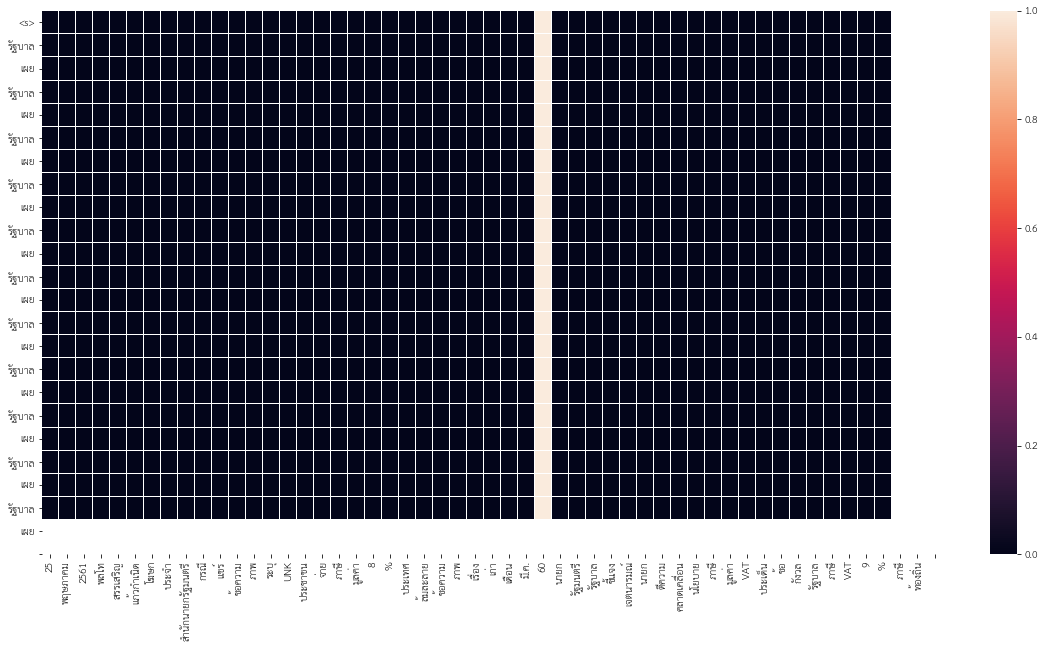

######################################################################################################################################################
headline  :  <s> นโยบาย ผลิต ครู เลือด </s> 
content   :  รัฐบาล โอกาส หลากหลาย สาขา อาชีพ สอบ ครู สาขา ขาดแคลน ฝึกอบรม เข้มข้น บรรจุ เชิญ รับฟัง ไทย คู่ฟ้า นโยบาย รัฐบาล โอกาส วุฒิ ศึกษา วิชาชีพ ครู สมัคร สอบ ครู แก้ ปัญหา ขาดแคลน ครู สาขา วิทยาศาสตร์ คณิตศาสตร์ ภาษา อังกฤษ สอบ คัดเลือก จำนวน UNK คน สำเร็จ ศึกษา ประเทศ อาชีพ วิศวกร ทันตแพทย์ ตำรวจ ต้องการ ครู สร้าง 
Input: [   27    71   969   525   328  1011   275   525  1391   529  1675  1062
   291   180    16   473    48    27    71  5639    54   886   275   446
  1011   275   342    34  1391   275   525  1021  2981   856  1432  1011
   831   108 31179    29   385    54    26   328  7518  4161   816   351
   275    38]
prediction : <s> รัฐบาล เร่งป้องกัน ปัญหา จราจร </s> 


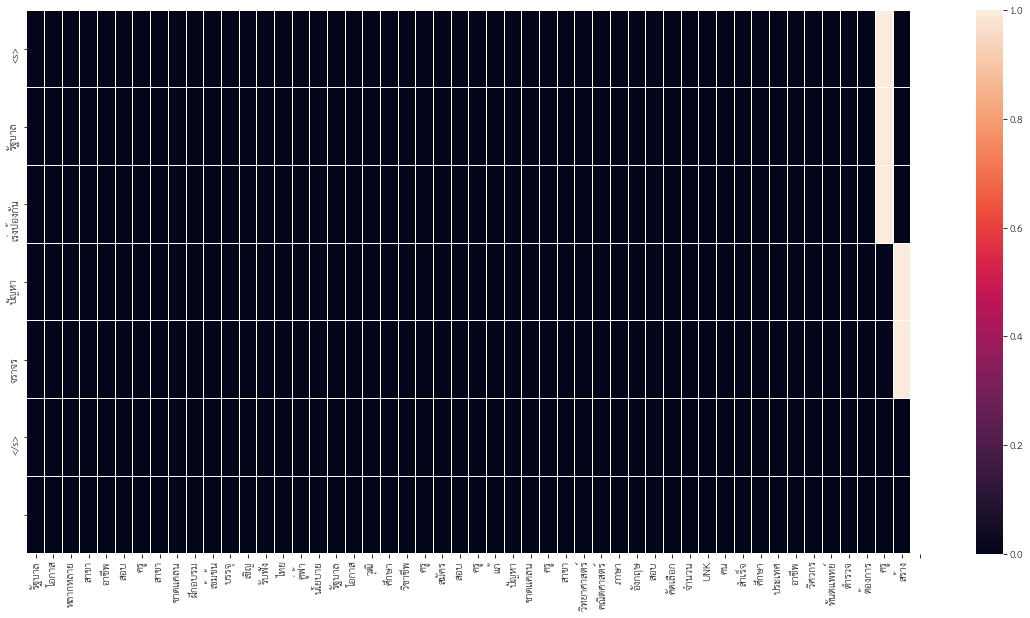

######################################################################################################################################################
headline  :  <s> งาน ชุมนุม ลูก เสือ จังหวัด ชาย แดน 12 จังหวัดสตูล </s> 
content   :  พล.อ.สุรเชษฐ์ ชัยวงศ์ รัฐมนตรี ว่าการ กระทรวงศึกษาธิการ ประธาน พิธี งาน ชุมนุม ลูก เสือ จังหวัด ชาย แดน 12 ค่าย ลูกเสือปากบาง อำเภอละงู จังหวัดสตูล พล.อ.สุรเชษฐ์ ชัยวงศ์ รมช. ศึกษาธิการ พิธี ท่าน บังคับบัญชา ลูกเสือ ลูกเสือ - UNK ชุมนุม คณะ ลูกเสือ ประเทศมาเลเซีย อินโดนีเซีย UNK เวียดนาม คณะ กรรมการ งาน เกียรติ ท่าน โอกาส ดี ผม งาน ชุมนุม ลูก เสือ จังหวัด ชาย แดน 
Input: [  508     1    11    58     9    51     4  1582   665  3098    70   178
   295   190  1459 25959  6787  3131   508   449   716    51   583  3551
  2101  2101    19 31179  1582    12  2101  3221  1641 31179   918    12
    57     4   400   583    71    67  1194     4  1582   665  3098    70
   178   295]
prediction : <s> สุรเชษฐ์ พื้นที่ ติดตาม โครงการ ห้อง เรียน กีฬา กลาง </s> 


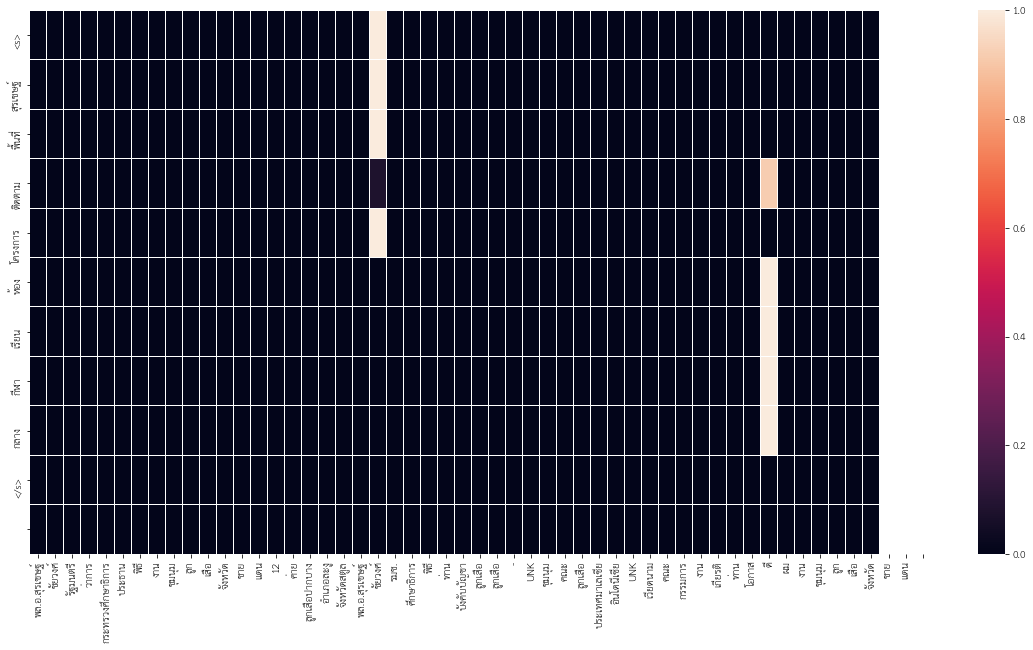

######################################################################################################################################################
headline  :  <s> เตือน จ้าง ห้าม บังคับ ลูกจ้าง ทำ งาน หยุด </s> 
content   :  กรมสวัสดิการ คุ้มครอง แรงงาน เตือน จ้าง ลูกจ้าง ทำ งาน หยุด กฎหมาย ยินยอม ลูกจ้าง จ่าย ค่า ทำ งาน หยุด นายอนันต์ชัย อุทัยพัฒนา ชีพ อธิบดี กรมสวัสดิการ คุ้มครอง แรงงาน กสร. พระราชบัญญัติ คุ้มครอง แรงงาน พ.ศ. 2541 ห้าม จ้าง ลูกจ้าง ทำ งาน หยุด ลูกจ้าง โอกาส พักผ่อน ทำ UNK จ้าง ลูกจ้าง ทำ งาน หยุด ประโยชน์ ผลิต จำหน่าย บริการ ลูกจ้าง 
Input: [  411   163    50   409   236   376    28     4   820   104  3724   376
   380   129    28     4   820   830   415   115   411   163    50   393
   419   163    50   114  3281  1118   236   376    28     4   820   376
    71  2927    28 31179   236   376    28     4   820   174    95   374
    60   376]
prediction : <s> กสร. เตือน จ้าง ลูกจ้าง ทำ งาน </s> 


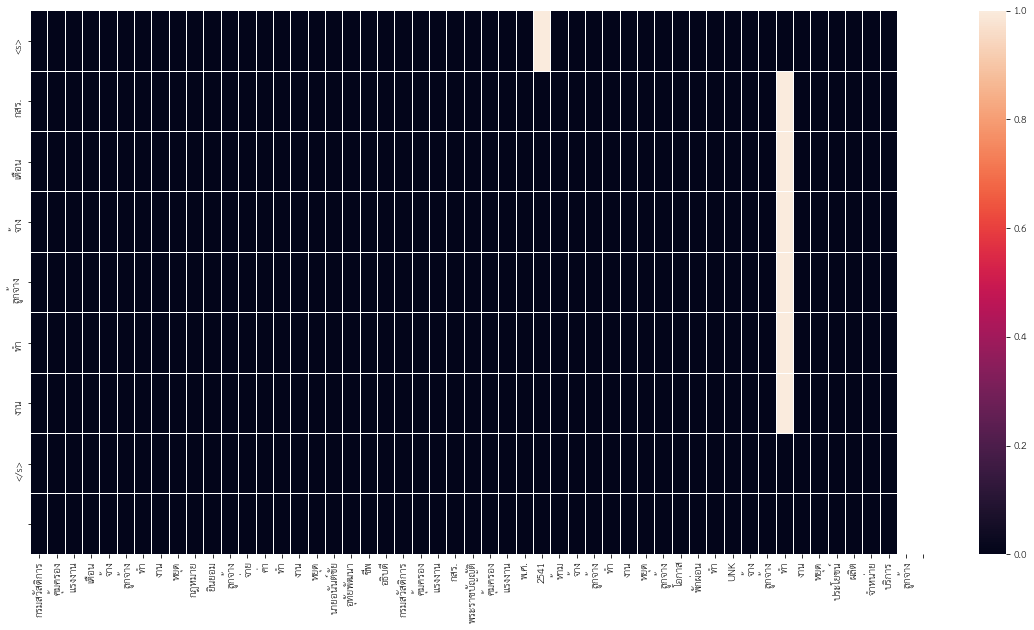

######################################################################################################################################################
headline  :  <s> ฐานะ คลัง รัฐบาล 8 เดือน ปี งบ 2560 </s> 
content   :  UNK สํานัก งาน เศรษฐกิจการ คลัง ฐานะ โฆษก กระทรวงการคลัง แถลง ข่าว ฐานะ คลัง รัฐบาล ระบบ กระแส เงิน สด 8 เดือน ปี งบ 2560 เดือน ตุลาคม 2559 – เดือน พฤษภาคม 2560 นายกฤษฎา  จี วิจารณะ ผู  อํานวยการ สํานัก งาน เศรษฐกิจการ คลัง ฐานะ โฆษก กระทรวงการคลัง แถลง ข่าว ฐานะ คลัง รัฐบาล ระบบ กระแส เงิน สด 
Input: [31179  3593     4  1470   283   155    59   171   154   121   155   283
    27    53   936    32   729   139   117     8   143    13   117   191
   182   140   117   230    13  7241  1393  7148  3755  3948  3593     4
  1470   283   155    59   171   154   121   155   283    27    53   936
    32   729]
prediction : <s> รัฐบาล สุทธิ ปี งบ 2561 </s> 


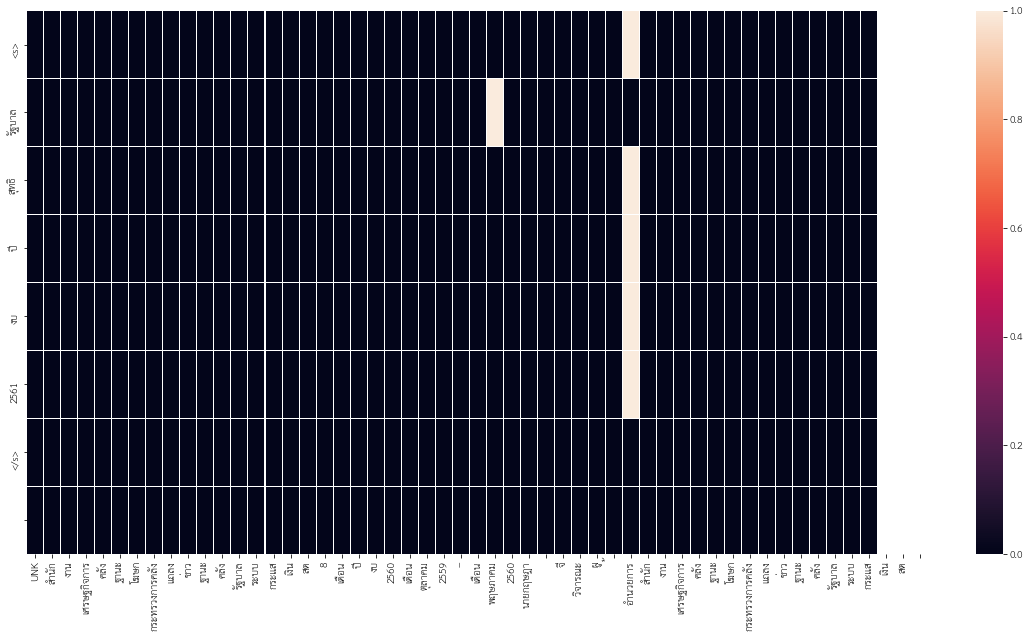

######################################################################################################################################################
headline  :  <s> พม. กำชับ ทีม One Home เร่ง เยียวยา จิตใจ สาว UNK วัย 15 ปี ลุง เขย บังคับ ข่มขืน UNK จ.บึงกาฬ เร่ง </s> 
content   :  12 ม.ค. 61 เวลา 08 . 30 น. กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์ พม. นายณรงค์ คงคำ รอง ปลัด กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์ รอง ปลัด พม. ประธาน ประชุม ศูนย์ ปฏิบัติการ กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์ ศปก.พม. 20 / 2561 ทราบ ปัญหา สังคม ร่วมหา แนวทาง ปัญหา ป้องกัน ปัญหา บริหาร แทน หน่วย งาน กระทรวง ประชุม ห้อง ประชุม ชั้น 8 กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์ สะพานขาว กรุงเทพฯ กรณี หญิง สาว 
Input: [190 557  97  15 327   6  41  18  88  78 575  14  23  88  14  23  78   9
   5  91 187  88 648 158  35  10 204  34  52 702  90  34 153  34  36  84
  45   4 215   5  37   5 107 139  88 636 165  94 423 388]
prediction : <s> พม. กำชับ จนท. เร่ง ช่วยเหลือ ด้อย โอกาส ปัญหา สังคม </s> 

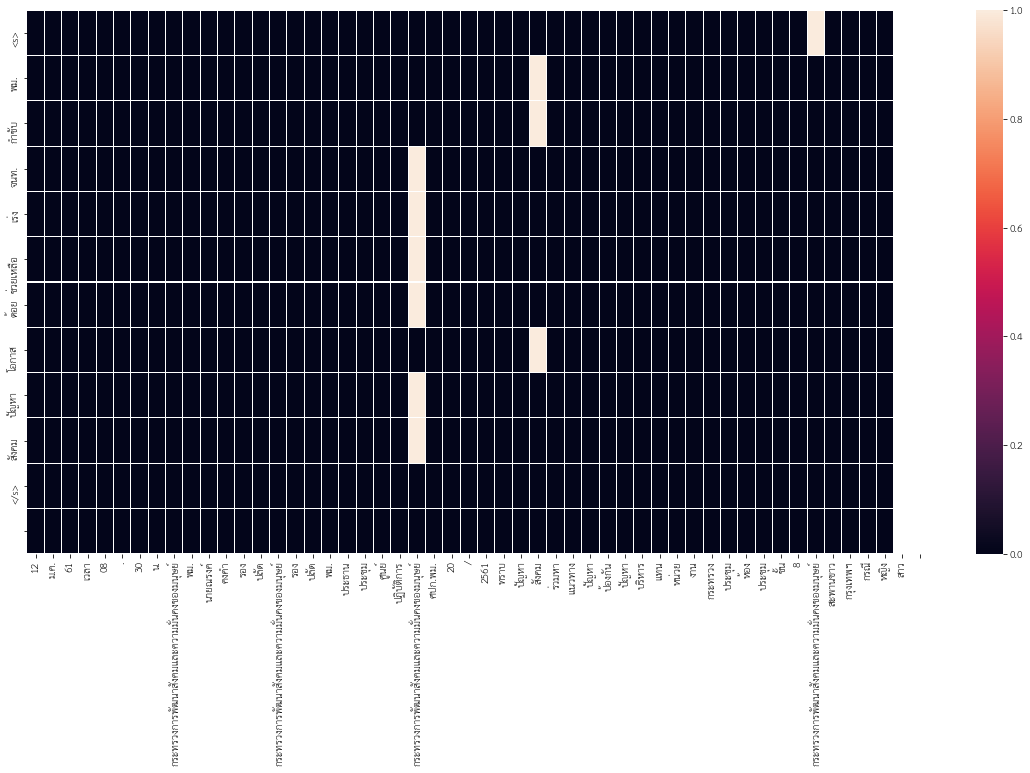

######################################################################################################################################################
headline  :  <s> นรม. เชิญชวน ประชาชน กิจกรรม สัปดาห์ เผยแผ่ พระพุทธศาสนา เนื่อง เทศกาล ฆบูชา ประจำ ปี 2561 พุทธมณฑล 25 ก.พ. – 2 . ค </s> 
content   :  ประชุม คณะ รัฐมนตรี นายสุวพันธุ์ ตันยุวรรธนะ รมต. นร. นายก รัฐมนตรี ประชาสัมพันธ์ สัปดาห์ เผยแผ่ พระพุทธศาสนา เนื่อง เทศกาล มาฆบูชา ย้ำ ยึด หลัก สอน พระพุทธเจ้า ดำเนิน ชีวิต ประจำ 20 กุมภาพันธ์ 2561 เวลา 08 . 30 น. บริเวณ โถง กลาง ตึกบัญชาการ  1 ทำเนียบรัฐบาล ประชุม คณะ รัฐมนตรี นายสุวพันธุ์ ตันยุวรรธนะ รัฐมนตรี ประจำ สำนักนายกรัฐมนตรี คณะ พลเอก ประยุทธ์ จันทร์โอชา นายก รัฐมนตรี ประชาสัมพันธ์ งาน 
Input: [   5   12    1  763  709 1627    7    1  517  767 5310 1576  142  365
 2710  168  697  169 1044 5493   30  109   25  158  225   10   15  327
    6   41   18  159  360  150  428   22   85    5   12    1  763    1
   25  146   12   61    7    1  517    4]
prediction : <s> รอง นรม. วิษณุ ปร

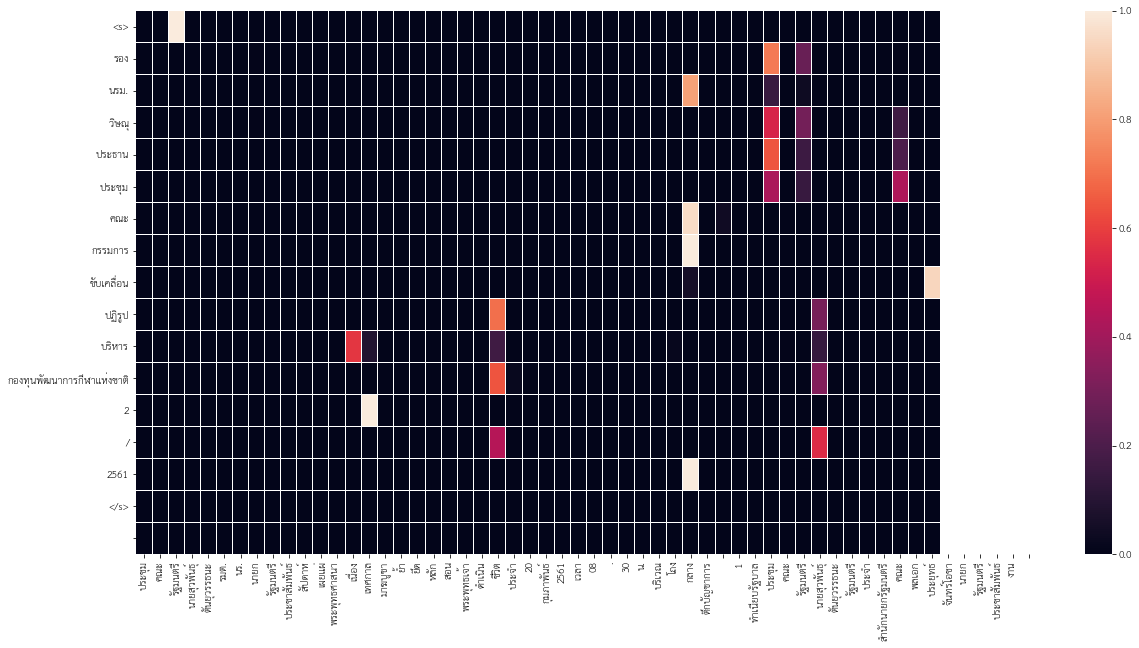

######################################################################################################################################################
headline  :  <s> ไทย UNK เจตนารมณ์ ปัญหา ยา เสพ ติด อาชญากรรม ทุจริต </s> 
content   :  จันทร์ 5 มีนาคม 2561 เวลา 13 . 15 น. นายยูริ เฟโดทอฟ UNK Fedotov อำนวย บริหาร สำนักงานว่า ยา เสพ ติด UNK UNODC รอง เลขาธิการ สหประชาชาติ เยี่ยม คารวะ พลอากาศ เอก  ประจิน จั่นตอง รอง นายก รัฐมนตรี รัฐมนตรี ว่าการ กระทรวงยุติธรรม ห้อง 1 ตึกบัญชา การ  1 ทำเนียบรัฐบาล สรุป สาระ รอง นายก รัฐมนตรี ยินดี อำนวย บริหาร UNODC ประชุม 
Input: [  433    62   186    10    15    96     6   119    18  8217 31179 10279
    89    36 10392   266   459   260 31179  3364    14   145  1606    76
   250   527   288   389    14     7     1     1    11    42    37    22
   444   498    22    85   151   274    14     7     1   370    89    36
  3364     5]
prediction : <s> รอง นายก รัฐมนตรี รัฐมนตรี ว่าการ กระทรวงยุติธรรม ต้อนรับ เอกอัครราชทูต วิสามัญ อำนาจ เต็ม สหพันธ์สาธารณร

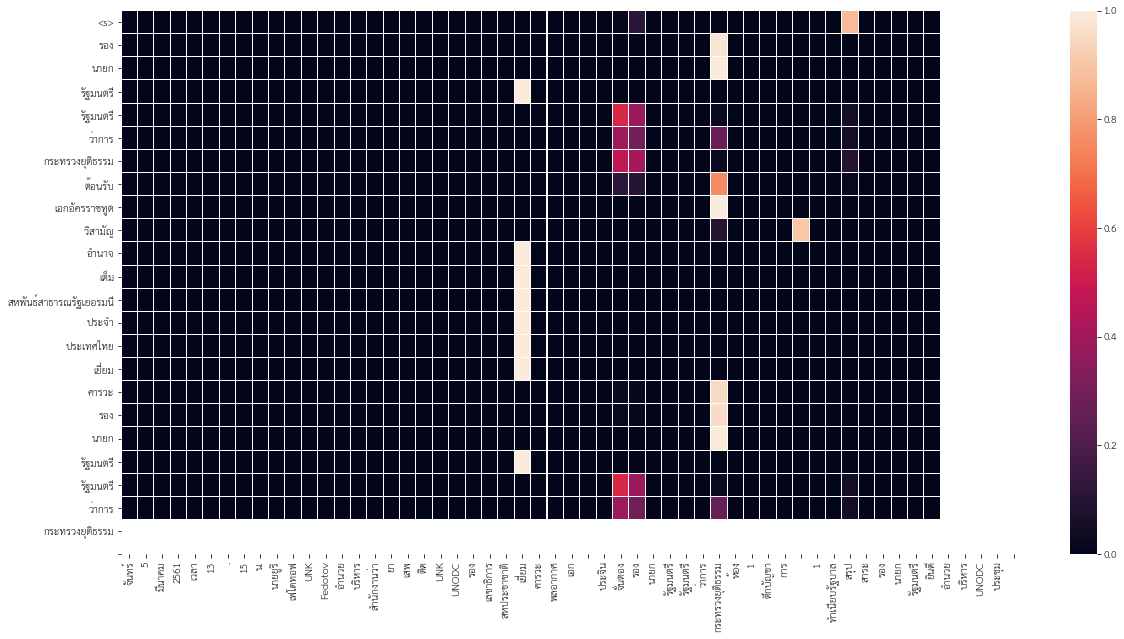

######################################################################################################################################################


In [68]:
for i in range(10):
  print('headline  : ',index2sentence(y_test[i]))
  print('content   : ',index2sentence(X_test[i]))
  translate(X_test[i])
  print( '#' * 150)

In [61]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  7982080   
_________________________________________________________________
gru (GRU)                    multiple                  3938304   
Total params: 11,920,384
Trainable params: 11,920,384
Non-trainable params: 0
_________________________________________________________________


In [62]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      multiple                  7982080   
_________________________________________________________________
gru_1 (GRU)                  multiple                  7084032   
_________________________________________________________________
dense_4 (Dense)              multiple                  31959500  
_________________________________________________________________
luong_attention_1 (LuongAtte multiple                  1049600   
Total params: 48,075,212
Trainable params: 48,075,212
Non-trainable params: 0
_________________________________________________________________


# Evaluation

In [40]:
!pip install rouge

In [63]:
# multiplicative + teacher forcing with stopwords v2 on non stopword dataset
# v2 + fixed vocab
#ckpt 30
from tqdm import tqdm_notebook
from rouge import Rouge
def inference(dataset) :
  pred_sum = []
  for c in tqdm_notebook(dataset):
    pred_sum.append(translate(c, plot=False))
  return pred_sum
def evaluate_result(gold_sum,pred_sum) : 
  rouge = Rouge()
  avg_scores = rouge.get_scores(pred_sum, gold_sum, avg=True)
  return avg_scores 

y_train_pred = inference(X_train)
y_val_pred = inference(X_val)
y_test_pred = inference(X_test)

print('Eval train :', evaluate_result(gold_sum_train, y_train_pred))
print('Eval val   :', evaluate_result(gold_sum_val, y_val_pred))
print('Eval test  :', evaluate_result(gold_sum_test, y_test_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Eval train : {'rouge-1': {'f': 0.393765478803841, 'p': 0.47210737626595006, 'r': 0.37209831896741163}, 'rouge-2': {'f': 0.228450475047703, 'p': 0.27035827870570117, 'r': 0.2193045732225287}, 'rouge-l': {'f': 0.4210182311750631, 'p': 0.5293910280599068, 'r': 0.3760316767368363}}
Eval val   : {'rouge-1': {'f': 0.28588061446078017, 'p': 0.35304628538001726, 'r': 0.26917211919557027}, 'rouge-2': {'f': 0.1052496850975252, 'p': 0.12873414219802373, 'r': 0.10104368224174208}, 'rouge-l': {'f': 0.3065232884275386, 'p': 0.3948962892690847, 'r': 0.2729828186420795}}
Eval test  : {'rouge-1': {'f': 0.2862311265320498, 'p': 0.35459675901169435, 'r': 0.2685342416432023}, 'rouge-2': {'f': 0.1056748265309013, 'p': 0.13019577526578494, 'r': 0.10067605329419772}, 'rouge-l': {'f': 0.305591090016956, 'p': 0.3944986630501569, 'r': 0.2723424285818568}}


In [52]:
# multiplicative + teacher forcing with stopwords v2 on non stopword dataset
# v2 + fixed vocab
#ckpt 14
from tqdm import tqdm_notebook
from rouge import Rouge
def inference(dataset) :
  pred_sum = []
  for c in tqdm_notebook(dataset):
    pred_sum.append(translate(c, plot=False))
  return pred_sum
def evaluate_result(gold_sum,pred_sum) : 
  rouge = Rouge()
  avg_scores = rouge.get_scores(pred_sum, gold_sum, avg=True)
  return avg_scores 

y_train_pred = inference(X_train)
y_val_pred = inference(X_val)
y_test_pred = inference(X_test)

print('Eval train :', evaluate_result(gold_sum_train, y_train_pred))
print('Eval val   :', evaluate_result(gold_sum_val, y_val_pred))
print('Eval test  :', evaluate_result(gold_sum_test, y_test_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Eval train : {'rouge-1': {'f': 0.2678664446605634, 'p': 0.33648829036234906, 'r': 0.2516156241589113}, 'rouge-2': {'f': 0.09368269801226557, 'p': 0.11709626761594157, 'r': 0.09005817228520605}, 'rouge-l': {'f': 0.29704424313582495, 'p': 0.4027850896860565, 'r': 0.2551338691034813}}
Eval val   : {'rouge-1': {'f': 0.2555609833442901, 'p': 0.32184460259601977, 'r': 0.24008650088737143}, 'rouge-2': {'f': 0.08115403075490489, 'p': 0.10143477900817495, 'r': 0.07839861346102645}, 'rouge-l': {'f': 0.28286298066247684, 'p': 0.3842520377755487, 'r': 0.24283442774547687}}
Eval test  : {'rouge-1': {'f': 0.25597948245971724, 'p': 0.32023478165752617, 'r': 0.24110789369085397}, 'rouge-2': {'f': 0.08201694396415636, 'p': 0.10244496717978283, 'r': 0.07830523277987024}, 'rouge-l': {'f': 0.28264296572050995, 'p': 0.3807105362068878, 'r': 0.24440827203066234}}


# Result

In [0]:
# multiplicative + teacher forcing with stopwords v2
# v2 + fixed vocab
#ckpt 1
from tqdm import tqdm_notebook
from rouge import Rouge
def inference(dataset) :
  pred_sum = []
  for c in tqdm_notebook(dataset):
    pred_sum.append(translate(c, plot=False))
  return pred_sum
def evaluate_result(gold_sum,pred_sum) : 
  rouge = Rouge()
  avg_scores = rouge.get_scores(pred_sum, gold_sum, avg=True)
  return avg_scores 

y_train_pred = inference(X_train)
y_val_pred = inference(X_val)
y_test_pred = inference(X_test)

print('Eval train :', evaluate_result(gold_sum_train, y_train_pred))
print('Eval val   :', evaluate_result(gold_sum_val, y_val_pred))
print('Eval test  :', evaluate_result(gold_sum_test, y_test_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



Eval train : {'rouge-1': {'f': 0.20695629888876663, 'p': 0.32248099933727187, 'r': 0.18211144801738888}, 'rouge-2': {'f': 0.056167243509854206, 'p': 0.08902134006759599, 'r': 0.05083865493692256}, 'rouge-l': {'f': 0.2503916176928038, 'p': 0.4624319156712636, 'r': 0.17956077607787885}}
Eval val   : {'rouge-1': {'f': 0.2030885578109264, 'p': 0.316366244935941, 'r': 0.17904144495370353}, 'rouge-2': {'f': 0.054194077480563006, 'p': 0.08566866088324544, 'r': 0.04893062875104341}, 'rouge-l': {'f': 0.24504653347060346, 'p': 0.44915955340631836, 'r': 0.17627970754926073}}
Eval test  : {'rouge-1': {'f': 0.2001745149389318, 'p': 0.3134033653549228, 'r': 0.17517209536024492}, 'rouge-2': {'f': 0.051779903983940806, 'p': 0.08391298895067664, 'r': 0.04616032759727008}, 'rouge-l': {'f': 0.241823264258236, 'p': 0.4466944139785788, 'r': 0.17328030055867996}}


In [0]:
# multiplicative + teacher forcing with stopwords v2
# v2 + fixed vocab
#ckpt 8
from tqdm import tqdm_notebook
from rouge import Rouge
def inference(dataset) :
  pred_sum = []
  for c in tqdm_notebook(dataset):
    pred_sum.append(translate(c, plot=False))
  return pred_sum
def evaluate_result(gold_sum,pred_sum) : 
  rouge = Rouge()
  avg_scores = rouge.get_scores(pred_sum, gold_sum, avg=True)
  return avg_scores 

y_train_pred = inference(X_train)
y_val_pred = inference(X_val)
y_test_pred = inference(X_test)

print('Eval train :', evaluate_result(gold_sum_train, y_train_pred))
print('Eval val   :', evaluate_result(gold_sum_val, y_val_pred))
print('Eval test  :', evaluate_result(gold_sum_test, y_test_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [44]:
# multiplicative + teacher forcing with stopwords v2
# v2 + fixed vocab
#ckpt 13
from tqdm import tqdm_notebook
from rouge import Rouge
def inference(dataset) :
  pred_sum = []
  for c in tqdm_notebook(dataset):
    pred_sum.append(translate(c, plot=False))
  return pred_sum
def evaluate_result(gold_sum,pred_sum) : 
  rouge = Rouge()
  avg_scores = rouge.get_scores(pred_sum, gold_sum, avg=True)
  return avg_scores 

y_train_pred = inference(X_train)
y_val_pred = inference(X_val)
y_test_pred = inference(X_test)

print('Eval train :', evaluate_result(gold_sum_train, y_train_pred))
print('Eval val   :', evaluate_result(gold_sum_val, y_val_pred))
print('Eval test  :', evaluate_result(gold_sum_test, y_test_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Eval train : {'rouge-1': {'f': 0.41126112113259183, 'p': 0.5131714970526203, 'r': 0.3772491348229971}, 'rouge-2': {'f': 0.2508934553031949, 'p': 0.3060425258006873, 'r': 0.23435873181449077}, 'rouge-l': {'f': 0.4448940595323022, 'p': 0.604497404448062, 'r': 0.3762602960529442}}
Eval val   : {'rouge-1': {'f': 0.2902443635499911, 'p': 0.37726938162335394, 'r': 0.2633481006187956}, 'rouge-2': {'f': 0.12756718351910876, 'p': 0.16020075149883703, 'r': 0.11828772263097327}, 'rouge-l': {'f': 0.31495077629232116, 'p': 0.44267955637803025, 'r': 0.2637238697263758}}
Eval test  : {'rouge-1': {'f': 0.28989588492366175, 'p': 0.3753072720902093, 'r': 0.2630092947779181}, 'rouge-2': {'f': 0.12334320464675239, 'p': 0.1542600338545196, 'r': 0.11439897015144423}, 'rouge-l': {'f': 0.3130701869481172, 'p': 0.4368890484158475, 'r': 0.2631002405181809}}


In [55]:
# multiplicative + teacher forcing with stopwords v2
# v2 + fixed vocab
#ckpt 18
from tqdm import tqdm_notebook
from rouge import Rouge
def inference(dataset) :
  pred_sum = []
  for c in tqdm_notebook(dataset):
    pred_sum.append(translate(c, plot=False))
  return pred_sum
def evaluate_result(gold_sum,pred_sum) : 
  rouge = Rouge()
  avg_scores = rouge.get_scores(pred_sum, gold_sum, avg=True)
  return avg_scores 

y_train_pred = inference(X_train)
y_val_pred = inference(X_val)
y_test_pred = inference(X_test)

print('Eval train :', evaluate_result(gold_sum_train, y_train_pred))
print('Eval val   :', evaluate_result(gold_sum_val, y_val_pred))
print('Eval test  :', evaluate_result(gold_sum_test, y_test_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Eval train : {'rouge-1': {'f': 0.5028670271537814, 'p': 0.6048210038337819, 'r': 0.4679914233914688}, 'rouge-2': {'f': 0.36466427257184014, 'p': 0.43159787767112884, 'r': 0.3436213362407284}, 'rouge-l': {'f': 0.5428453484943769, 'p': 0.7081196633274113, 'r': 0.4672712894481457}}
Eval val   : {'rouge-1': {'f': 0.29484536937368694, 'p': 0.37885109093835523, 'r': 0.2682441128764293}, 'rouge-2': {'f': 0.13266043296383676, 'p': 0.16510014427826977, 'r': 0.12289184762834028}, 'rouge-l': {'f': 0.31828780494921244, 'p': 0.44043734347162783, 'r': 0.2682086850303135}}
Eval test  : {'rouge-1': {'f': 0.2912714004396029, 'p': 0.372059703631078, 'r': 0.2660011195174938}, 'rouge-2': {'f': 0.12660259109871938, 'p': 0.1557188092376496, 'r': 0.1186081133610436}, 'rouge-l': {'f': 0.3146142418838051, 'p': 0.43353908146068404, 'r': 0.26568783356553116}}
